<a href="https://colab.research.google.com/github/zychen1017/Machine-learning/blob/main/Ccross_validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. **Cross-calidation** is a step in the process of building a machine learning medel which helps us ensure that our medels fit the data accurately and also ensures that we do not overfit.

In [1]:
import pandas as pd
df = pd.read_csv('winequality-red.csv', sep=';')

In [2]:
# columns quality is targets, we check how many unique value are there.
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [3]:
# a mapping dictionary tat maps the quality values from 0 to 5
quality_mapping = {3:0, 4:1, 5:2, 6:3, 7:4, 8:5}

# you can use the map function of pandas with any dictionary
# to convert the values in a given colums to values in the dictionary.
df["quality"] = df.quality.map(quality_mapping)


In [4]:
df.shape  #This dataset has 1599 samples.

(1599, 12)

In [5]:
# We keep 1000 samples for training and 599 as a separate set.
# use sample with frac=1  to shuffle the dataframe
# we reset the indices since they change after
# shuffling the dataframe
df = df.sample(frac=1, random_state=1).reset_index(drop=True)

# top 1000 rows are selected for training
df_train = df.head(1000)

# bottom 599 values are selected for testing/validation
df_test = df.tail(599)

**df.sample(frac=1):** This randomly samples a fraction (frac) of the DataFrame. When **frac=1**, it means you are sampling 100% of the rows, effectively shuffling the DataFrame.if frac=0.2 it means sampling 20% of the rows.

In [6]:
df_train.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,8.8,0.41,0.64,2.2,0.093,9.0,42.0,0.99860,3.54,0.66,10.5,2
1,8.7,0.63,0.28,2.7,0.096,17.0,69.0,0.99734,3.26,0.63,10.2,3
2,10.4,0.34,0.58,3.7,0.174,6.0,16.0,0.99700,3.19,0.70,11.3,3


In [7]:
from sklearn import tree
from sklearn import metrics

In [8]:
x_train = df_train.drop('quality', axis=1)
y_train = df_train['quality']

x_test = df_test.drop('quality', axis=1)
y_test = df_test['quality']

In [9]:
# fit model
clf = tree.DecisionTreeClassifier(max_depth=7)
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=7)

In [10]:
# generate predictions on the training set
train_predictions = clf.predict(x_train)
# generate predictions on the test set
test_predictions = clf.predict(x_test)
# calculate the accuracy of predictions on
# training data set
train_accuracy = metrics.accuracy_score(df_train.quality, train_predictions)
# calculate the accuracy of predictions on
# test data set
test_accuracy = metrics.accuracy_score(df_test.quality, test_predictions)
print(train_accuracy)
print(test_accuracy)

0.767
0.5342237061769616


There's a big difference between Train_accuracy and Test_accuracy, which means the model is overfitting.

In [11]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

using the **rc** method from the matplotlib library to set the size of the x-axis and y-axis tick labels on plots globally.

In [12]:
# this is our global size of label text
# on the plots
matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)

# This line ensures that the plot is displayed
# inside the notebook
%matplotlib inline

In [13]:
# initialize lists to store accuracies
# for training and test data
# we start with 50% accuracy
train_accuracies = [0.5]
test_accuracies = [0.5]

# iterate over a few depth values
for depth in range(1, 25):
    # init the model
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    # fit the model on given features
    clf.fit(x_train, y_train)
    # create training & test predictions
    train_predictions = clf.predict(x_train)
    test_predictions = clf.predict(x_test)
    # calculate training & test accuracies
    train_accuracy = metrics.accuracy_score(y_train, train_predictions)
    test_accuracy = metrics.accuracy_score(y_test, test_predictions)
    # append accuracies
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

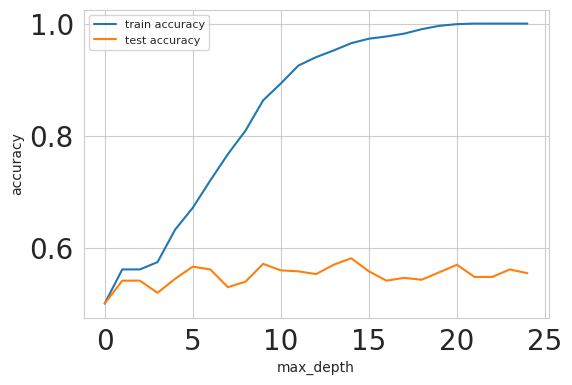

In [14]:
# create two plots using matplotlib and seaborn
plt.figure(figsize=(6,4))
sns.set_style("whitegrid")
plt.plot(train_accuracies, label="train accuracy")
plt.plot(test_accuracies, label="test accuracy")
plt.legend(loc="upper left", prop={'size': 8})
plt.xticks(range(0, 26, 5))
plt.xlabel("max_depth")
plt.ylabel("accuracy")
plt.show()

**Occam’s razor** in simple words states that one should not try to complicate things
that can be solved in a much simpler manner. In other words, the simplest solutions
are the most generalizable solutions. In general, whenever your model does not
obey Occam’s razor, it is probably overfitting.

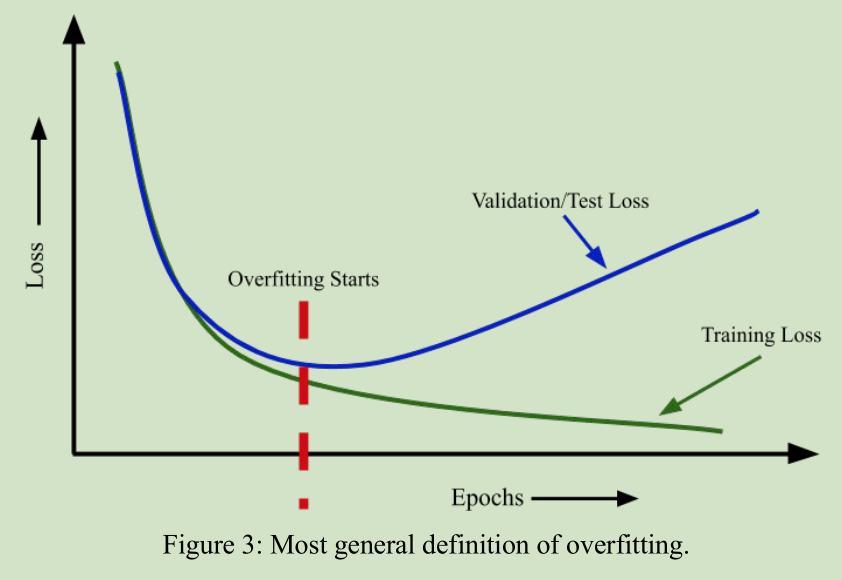

##### **1. k-fold cross-validation**

In [19]:
from sklearn.model_selection import KFold, cross_val_score
import numpy as np

# 创建一个随机森林分类器
clf = tree.DecisionTreeClassifier(max_depth=5)

# 创建一个k折交叉验证的对象
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# 使用交叉验证评估模型性能
results = cross_val_score(clf, x_train, y_train, cv=kfold)

# 打印每次折叠的性能结果
for i, result in enumerate(results):
    print(f"Fold {i+1}: {result}")

# 打印平均性能
print(f"Average Accuracy: {np.mean(results)}")


Fold 1: 0.545
Fold 2: 0.535
Fold 3: 0.58
Fold 4: 0.54
Fold 5: 0.525
Average Accuracy: 0.545


##### **2. stratified k-fold.**
If you have askewed dataset for binary classification with 90% positive samples and only 10%
negative samples.

In [21]:
from sklearn.model_selection import StratifiedKFold
# 创建一个随机森林分类器
clf = tree.DecisionTreeClassifier(max_depth=5)

# 创建一个k折交叉验证的对象
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 使用交叉验证评估模型性能
results = cross_val_score(clf, x_train, y_train, cv=skfold)

# 打印每次折叠的性能结果
for i, result in enumerate(results):
    print(f"Fold {i+1}: {result}")

# 打印平均性能
print(f"Average Accuracy: {np.mean(results)}")


Fold 1: 0.535
Fold 2: 0.555
Fold 3: 0.52
Fold 4: 0.56
Fold 5: 0.53
Average Accuracy: 0.54


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Text(0, 0.5, 'count')

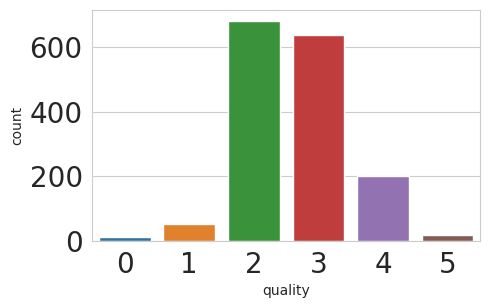

In [25]:
plt.figure(figsize=(5,3))
b = sns.countplot(x='quality', data=df)
b.set_xlabel("quality", fontsize=10)
b.set_ylabel("count", fontsize=10)

we can say that the quality is very much **skewed**.If we do a simple k-fold, we
won’t have an equal distribution of targets in every fold. Thus, we choose stratified
k-fold in this case.

#####  3. hold-out based validation
For large amount of data or time-series data, learn it by yourself.

##### When to use cross validation?
When the total amount of data is **small** and other methods do not continue to improve performance, try K-Fold.